# 1 - 准确率、精确率和召回率

## 1.1 混淆矩阵

在分类任务下，预测结果(Predicted Condition)与正确标记(True Condition)之间存在四种不同的组合，构成混淆矩阵(适用于多分类)：
   - TP：True Positives， 表示实际为正例且被分类器判定为正例的样本数
   - FP：False Positives， 表示实际为负例且被分类器判定为正例的样本数
   - FN：False Negatives， 表示实际为正例但被分类器判定为负例的样本数
   - TN：True Negatives， 表示实际为负例且被分类器判定为负例的样本数

<font color=#FF2121>小技巧：第一个字母表示划分正确与否；第二个字母表示分类器判定结果（P:判定为正例，N:判定为反例）</font>

|     | 预测正例  | 预测假例  |
|  :----:  |  :----:  | :----:  |
| 真实正例  | TP（真阳性） | FN（假阴性） |
| 真实假例  | FP（假阳性）  | TN（真阴性） |

## 1.2 准确率(Accuracy)、精确率(Precision) 与召回率(Recall)

准确率：对于给定的测试数据集，分类器正确分类的样本数与总样本数之比

$$
Accuracy = \frac{TP+TN}{TP+FP+TN+FN}
$$

精确率：预测结果为正例样本中真实为正例的比例

$$
Precision = \frac{TP}{TP+FP}
$$

    精确率高，意味着分类器要尽量在 “更有把握” 的情况下才将样本预测为正样本， 这意味着精确率能够很好的体现模型对于负样本的区分能力，精确率越高，则模型对负样本区分能力越强。
    
    简单来说就是，精确率需要降低FP,减少把假例判定成正例的情况，也就是分类器判定正例的条件更为严格。
    
召回率：真实为正例的样本中预测结果为正例的比例

$$
Precision = \frac{TP}{TP+FN}
$$

    召回率高，意味着分类器尽可能将有可能为正样本的样本预测为正样本，这意味着召回率能够很好的体现模型对于正样本的区分能力，召回率越高，则模型对正样本的区分能力越强

**精确率与召回率是此消彼长的关系， 如果分类器只把可能性大的样本预测为正样本，那么会漏掉很多可能性相对不大但依旧满足的正样本，从而导致召回率降低。**

## 1.3 F1 score

调和均值，是精确率和召回率评估指标,理想情况下做到两个指标都高当然最好，但一般情况下，精确率高，召回率就低，召回率高，精确率就低。

$$
F - Score = (1+\beta^{2}) * \frac{Precision * Recall}{(\beta^{2}*Precision)+Recall}
$$

所以在实际中常常需要根据具体情况做出取舍，例如一般的搜索情况，在保证召回率的条件下，尽量提升精确率。而像癌症检测、地震检测、金融欺诈等，则在保证精确率的条件下，尽量提升召回率。

 引出了一个新的指标F-score,综合考虑Precision和Recall的调和值。

   - 当β=1时，称为 F1-score或者 F1-Measure，这时，精确率和召回率都很重要，权重相同。
   - 当有些情况下，我们认为精确率更重要些，那就调整β的值小于1，
   - 如果我们认为召回率更重要些，那就调整β的值大于1。

常见的F1-Score计算公式如下：
$$
F Measure = \frac{2}{\frac{1}{precision}\frac{1}{recall}} = \frac{2TP}{2TP+FP+FN}
$$

# 2 - Roc曲线

ROC的全名叫做Receiver Operating Characteristic，中文名字叫“受试者工作特征曲线”，其主要分析工具是一个画在二维平面上的曲线——ROC 曲线。平面的横坐标是false positive rate(FPR)，纵坐标是true positive rate(TPR)。对某个分类器而言，我们可以根据其在测试样本上的表现得到一个TPR和FPR点对。这样，此分类器就可以映射成ROC平面上的一个点。调整这个分类器分类时候使用的阈值，我们就可以得到一个经过(0, 0)，(1, 1)的曲线，这就是此分类器的ROC曲线。

- 真阳性率，又叫做灵敏度（Sensitivity）、召回率（Recall）

$$
TPR = \frac{TP}{TP+FN}
$$

- 假阳性率，又叫做误诊率（=1-特异度）

$$
FPR = \frac{FP}{FP+TN}
$$

- 假阴性率，又叫漏诊率（=1-灵敏度）

$$
FNR = \frac{FN}{TP+FN}
$$

- 真阴性率，又叫特异度（Specificity）

$$
TNR = \frac{TN}{FP+TN}
$$

对于一个分类任务的测试集，其本身有正负两类标签，我们对于这个测试集有一个预测标签，也是正负值。分类器开始对样本进行分类时，首先会计算该样本属于正确类别的概率，进而对样本的类别进行预测。比如说给出一组图片，让分类器判断该图片是否为汉堡，分类器在开始分类前会首先计算该图片为汉堡的概率，进而对该图片的类别进行预测，是汉堡或者不是汉堡。我们用概率来表示横坐标，真实类别表示纵坐标，分类器在测试集上的效果就可以用散点图来表示，如图所示

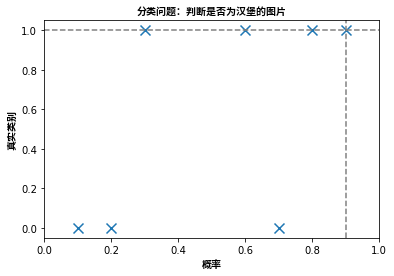

In [68]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

plt.xlim(0, 1)
zhfont1 = matplotlib.font_manager.FontProperties(fname="../../1_数据分析/file/SourceHanSansSC-Bold.otf") 
plt.title("分类问题：判断是否为汉堡的图片", fontproperties=zhfont1)
plt.xlabel("概率", fontproperties=zhfont1)
plt.ylabel("真实类别", fontproperties=zhfont1)
x = np.array([0.1, 0.2, 0.3, 0.6, 0.7, 0.8, 0.9])
y = np.array([0, 0, 1, 1, 0, 1, 1])
plt.scatter(x, y, marker='x', s=100)
plt.axhline(y=1, ls='--', c="gray")
plt.axvline(x=0.9, ls='--', c="gray")

那么如何通过概率来获得预测的类别呢？
通常我们会设置一个阈值，这里以0.5为例。

当概率≥0.5时，分类器认为这张图片是汉堡，也就是图中虚线右边的部分，我们用橙色来表示；

当概率<0.5时，分类器认为这张图片不是汉堡，也就是图中虚线左边的部分，我们用薄荷绿来表示；

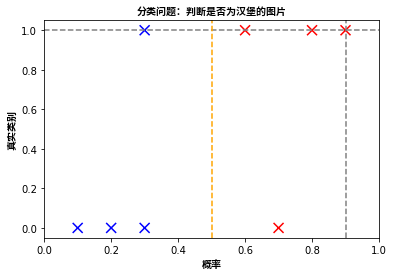

In [67]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

plt.xlim(0, 1)
zhfont1 = matplotlib.font_manager.FontProperties(fname="../../1_数据分析/file/SourceHanSansSC-Bold.otf") 
plt.title("分类问题：判断是否为汉堡的图片", fontproperties=zhfont1)
plt.xlabel("概率", fontproperties=zhfont1)
plt.ylabel("真实类别", fontproperties=zhfont1)
x = np.array([0.1, 0.2, 0.3, 0.3, 0.6, 0.7, 0.8, 0.9])
y = np.array([0, 0, 0, 1, 1, 0, 1, 1])
colors = ["blue","blue","blue","blue","red","red","red","red",]
plt.scatter(x, y, marker='x', s=100, c=colors)
plt.axhline(y=1, ls='--', c="gray")
plt.axvline(x=0.9, ls='--', c="gray")
plt.axvline(x=0.5, ls='--', c="orange")

可以根据图中的预测结果得到一个混淆矩阵

|     | 预测-是汉堡  | 预测-不是汉堡  |
|  :----:  |  :----:  | :----:  |
| 真实-是汉堡  | 3 | 1 |
| 真实-不是汉堡  | 1  | 3 |

故而当阈值只有0.5的时候，有且仅有一个混淆矩阵与之对应。

但实际上我们的阈值可以取0-1之间的任何一个数，因此我们可以得到很多个混淆矩阵。

有没有一种方法能把所有的混淆矩阵表示在同一个二维空间内呢?

这时ROC曲线便能把它们全部表示出来，ROC曲线的横纵坐标分别是FPR（False Positive Rate）和TPR（True Positive Rate）。这时我们就能在二维空间中找出一个唯一的点来与一个混淆矩阵相对应，当我们有很多个混淆矩阵的时候，对应的二维空间中就会有很多个点，如果我们把这些点连起来，那么构成的曲线便是我们的ROC曲线。

回到刚才那个对图片进行分类的例子，当阈值在[0,0.1]区间时，分类器认为所有的图片都是汉堡，这时我们就能得到一个混淆矩阵以及该混淆矩阵中TPR和FPR的值，同时在二维平面坐标轴中得到一个坐标为(1,1)的点.

|     | 预测-是汉堡  | 预测-不是汉堡  |
|  :----:  |  :----:  | :----:  |
| 真实-是汉堡  | 4 | 0 |
| 真实-不是汉堡  | 4  | 0 |

同理，当我们的阈值取(0.1,0.2]，(0.2,0.3]，…，(0.9,1]时，都会有一个新的混淆矩阵的TPR和FPR的值与之对应，同时二维空间中也会出现一个新的点与之对应，知道阈值取到最大，二维空间中找到了所有与混淆矩阵对应的点，我们把这些点连起来就得到了我们所需要的ROC曲线。

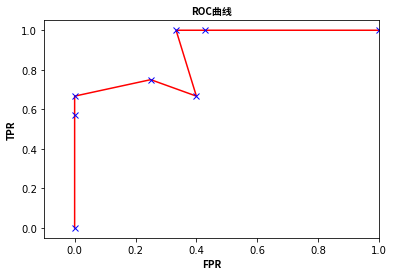

In [93]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

plt.xlim(-0.1, 1)
zhfont1 = matplotlib.font_manager.FontProperties(fname="../../1_数据分析/file/SourceHanSansSC-Bold.otf") 
plt.title("ROC曲线", fontproperties=zhfont1)
plt.xlabel("FPR", fontproperties=zhfont1)
plt.ylabel("TPR", fontproperties=zhfont1)
x = np.array([0,0,0,1/4,2/5,1/3,3/7,1])
y = np.array([0,4/7,2/3,3/4,2/3,1,1,1])
plt.plot(x, y, marker='x', c="red", markeredgecolor="blue")

**由上可知，ROC曲线的横坐标和纵坐标其实是没有相关性的，所以不能把ROC曲线当做一个函数曲线来分析，应该把ROC曲线看成无数个点，每个点都代表一个分类器，其横纵坐标表征了这个分类器的性能。**

为什么使用ROC曲线？

**因为ROC曲线有个很好的特性：当测试集中的正负样本的分布变化的时候，ROC曲线能够保持不变。**

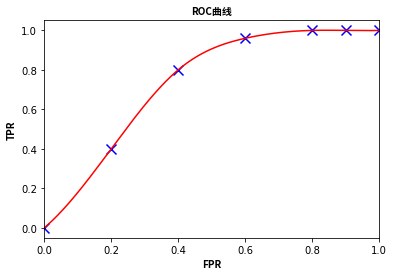

In [123]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from scipy.interpolate import make_interp_spline

plt.xlim(0, 1)
zhfont1 = matplotlib.font_manager.FontProperties(fname="../../1_数据分析/file/SourceHanSansSC-Bold.otf") 
plt.title("ROC曲线", fontproperties=zhfont1)
plt.xlabel("FPR", fontproperties=zhfont1)
plt.ylabel("TPR", fontproperties=zhfont1)
x = np.array([0,0.2,0.4,0.6,0.8,0.9,1])
y = np.array([0,0.4,0.8,0.96,1,1,1])
x_smooth = np.linspace(x.min(), x.max(), 300)
model = make_interp_spline(x,y)
y_smooth = model(x_smooth)
plt.scatter(x, y, marker='x', s=100, c="blue")
plt.plot(x_smooth, y_smooth, c="red")

ROC曲线图中的四个点
- 第一个点：(0,1)，即FPR=0, TPR=1，这意味着FN=0，并且FP=0。这是完美的分类器，它将所有的样本都正确分类。
- 第二个点：(1,0)，即FPR=1，TPR=0，类似地分析可以发现这是一个最糟糕的分类器，因为它成功避开了所有的正确答案。
- 第三个点：(0,0)，即FPR=TPR=0，即FP=TP=0，可以发现该分类器预测所有的样本都为负样本（negative）。
- 第四个点：(1,1)，即分类器实际上预测所有的样本都为正样本。

经过以上的分析，ROC曲线越接近左上角，该分类器的性能越好。

# 2 - AUC

## 2.1 - 定义

AUC(Area Under Curve)，被定义为ROC曲线下的面积，取值范围一般在0.5和1之间。使用AUC值作为评价标准是因为很多时候ROC曲线并不能清晰的说明哪个分类器的效果更好，而作为一个数值，对应AUC更大的分类器效果更好。

- 因为是在1x1的方格里求面积，AUC必在0~1之间。

- 假设阈值以上是阳性，以下是阴性；若随机抽取一个阳性样本和一个阴性样本，分类器正确判断阳性样本的值高于阴性样本之机率=AUC

简单说：**AUC值越大的分类器，正确率越高。**


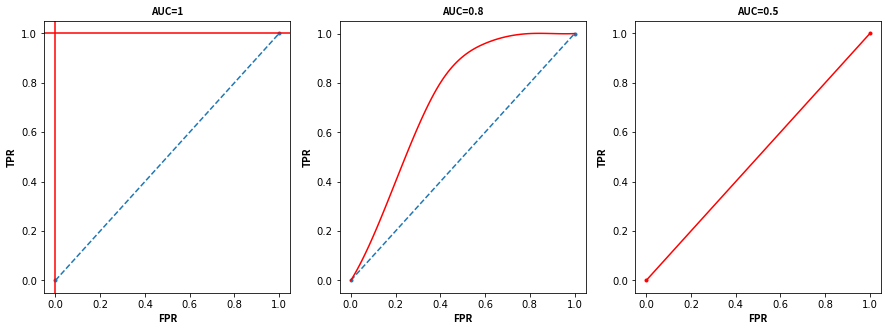

In [192]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from scipy.interpolate import make_interp_spline

fig, ax1 = plt.subplots(figsize=(15, 5))
plt.subplot(1,3,1)
zhfont1 = matplotlib.font_manager.FontProperties(fname="../../1_数据分析/file/SourceHanSansSC-Bold.otf") 
# auc=1
plt.title("AUC=1", fontproperties=zhfont1)
plt.xlabel("FPR", fontproperties=zhfont1)
plt.ylabel("TPR", fontproperties=zhfont1)
plt.subplot(1,3,1)
plt.plot([0,1], [0,1], linestyle='--', marker='.')
plt.axhline(y=1, c="red")
plt.axvline(x=0, c="red")
# auc=0.8
plt.subplot(1,3,2)
plt.title("AUC=0.8", fontproperties=zhfont1)
plt.xlabel("FPR", fontproperties=zhfont1)
plt.ylabel("TPR", fontproperties=zhfont1)
x = np.array([0,0.2,0.4,0.6,0.8,0.9,1])
y = np.array([0,0.4,0.8,0.96,1,1,1])
x_smooth = np.linspace(x.min(), x.max(), 100)
model = make_interp_spline(x,y)
y_smooth = model(x_smooth)
plt.plot([0,1], [0,1], linestyle='--', marker='.')
plt.plot(x_smooth, y_smooth, c="red")
# auc=0.5
plt.subplot(1,3,3)
plt.title("AUC=0.5", fontproperties=zhfont1)
plt.xlabel("FPR", fontproperties=zhfont1)
plt.ylabel("TPR", fontproperties=zhfont1)
plt.plot([0,1], [0,1], linestyle='-', marker='.', color="red")

从AUC判断分类器（预测模型）优劣的标准：

- AUC = 1，是完美分类器，采用这个预测模型时，存在至少一个阈值能得出完美预测。绝大多数预测的场合，不存在完美分类器。

- 0.5 < AUC < 1，优于随机猜测。这个分类器（模型）妥善设定阈值的话，能有预测价值。

- AUC = 0.5，跟随机猜测一样（例：丢铜板），模型没有预测价值。

- AUC < 0.5，比随机猜测还差；但只要总是反预测而行，就优于随机猜测。

## 2.1 - 计算

AUC的计算有两种方式，都是以逼近法求近似值。

**AUC为什么可以衡量分类的效果？**

**AUC就是从所有1样本中随机选取一个样本，从所有0样本中随机选取一个样本，然后根据你的分类器对两个随机样本进行预测，把1样本预测为1的概率为p1，把0样本预测为1的概率为p2，p1>p2的概率就是AUC。所以AUC应该反映的是分类器对样本的排序能力，另外，AUC对样本类别是否均衡并不敏感，这也是不均衡样本通常采用AUC评价分类性能的原因。**

随机给一个正样本和一个负样本，多大概率正样本的score更高。

换一种说法，假设正样本有 M 个，负样本有 N 个，在所有 M ∗ N个正负样本对中，有多少正样本比负样本分高。提高AUC意味着，将所有样本按score排序，正样本要尽量排在负样本前面。AUC的计算公式为：

$$
AUC = \frac{\sum_{ins_{i}\in positive}Rank_{ins_{i}}-\frac{M*(M+1)}{2}}{M*N}
$$

## 2.2 - AUC是ROC曲线下方面积的直观理解

AUC的定义是ROC曲线的下部的面积，概率意义是随机取一对正负样本，正样本得分大于负样本得分的概率。

这个概念直观上能看懂但是很难理解为什么和ROC曲线的下部面积有关，下面给出一个直观上的理解:

假如我们有一组预测值和真实值，概率大小从大到小已经排列好

|  P1  | P2  | P3  |  P4  | N1  | N2  | N3  | N4  |
|  :----:  |  :----:  | :----:  |  :----:  |  :----:  | :----:  |  :----:  | :----:  |
| 0.9  | 0.8 | 0.7 | 0.6 | 0.4 | 0.3 | 0.2 | 0.1 |
| 1  | 1 | 1 | 1 | 0 | 0 | 0 | 0 | 0 |

总共8个样本，真实值是四个证例标签为1，四个反例标签为0，如果我们用逻辑回归0.5为界限的话，可以看出我们的预测是100%正确的。那么我们开始绘制ROC曲线，

    - 从P1开始，用阈值0.9（或者不说阈值，就说只考虑P1），只有P1是预测为1，其余都预测为0，那么TPR =1/4=0.25，FPR=0，ROC点（0， 0.25）
    - 再考虑P2，用阈值0.8，那么P1,P2预测为1，那么TPR =2/4=0.5，FPR=0. ROC点（0， 0.5）
    - 考虑P3, 同理得到ROC点（0， 0.75），
    - 考虑P4，ROC点（0， 1）
    - 考虑N1，这个时候ROC点是（0.25， 1）开始右移动了！
    - N2,N3 N4 点分别为（0.5, 1）(0.75,1 ) (1,1)

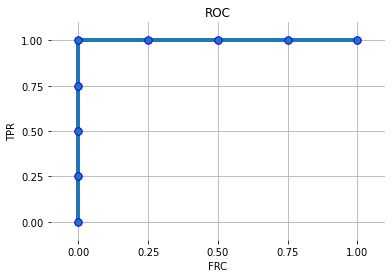

In [45]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from matplotlib.ticker import AutoMinorLocator,MultipleLocator,FuncFormatter
from scipy.interpolate import make_interp_spline

#设置x，y 的主刻度定位器
ax=plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(0.25))
# 设置x，y的范围
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.title("ROC")
plt.xlabel("FRC")
plt.ylabel("TPR")
plt.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# 数值
x = np.array([0,0,0,0,0,0.25,0.5,0.75,1])
y = np.array([0,0.25,0.5,0.75,1,1,1,1,1])
plt.plot(x, y, marker='.',markeredgecolor="blue",markersize=15,linewidth=4)

**发现了吗，绘制ROC曲线就是一个一个的去添加样本，正样本所对应的是Y轴，负样本所对应的是X轴。从P1到P4，从N1到N4， 是按概率大小排列的。考虑到正样本就是向上移动，负样本就是向右移动。**

于是乎我们可以把Y轴看做正例P的个数，X轴看做负例N的个数，整个坐标系的面积就是$M*N$个小矩形组成（这里的感觉是不是有点像微积分了），$M*N$是什么，是正样本和负样本的样本对数。

同时因为这个例子中所有P的概率都大于所有N，所以所有正样本概率大于负样本概率的样本对数,也是$M*N$，因为我们所有的正样本预测的概率都比负样本预测的概率大。

我们在这个例子中用的是一个完美算法，P和N完美预测,所以所有的P都是排列在N前面的，ROC曲线也就是一条Y=1的直线，

**为了更好理解，我们来看一个P4和N1预测错误的情况**

|  P1  | P2  | P3  |  N1  | P4  | N2  | N3  | N4  |
|  :----:  |  :----:  | :----:  |  :----:  |  :----:  | :----:  |  :----:  | :----:  |
| 0.9  | 0.8 | 0.7 | 0.6 | 0.4 | 0.3 | 0.2 | 0.1 |
| 1  | 1 | 1 | 0 | 1 | 0 | 0 | 0 | 0 |
| 预测为1  | 预测为1 | 预测为1 | 预测为1 | 预测为0 | 预测为0 | 预测为0 | 预测为0 | 预测为0 |

和上面完美算法结果相比，这个例子中我们有一个N1比P4预测概率还要大，根据逻辑回归0.5的界限的话，这个N1我们预测为1

我们同样按照上述步骤绘制ROC曲线

    - 从P1开始，用阈值0.9（或者不说阈值，就说值考虑P1），只有P1是预测为1，其余都预测为0，那么TPR =1/4=0.25，FPR=0，ROC点（0, 0.25）
    - 再考虑P2，用阈值0.8，那么P1,P2预测为1，那么TPR =2/4=0.5，FPR=0. ROC点（0, 0.5）
    - 考虑P3, 同理得到ROC点（0, 0.75），
    - 这里个上面有区别了，P3下面是N1，所以我们要向右移动了不再上向上移动，那么ROC点为（0.25, 0.75）
    - N1下面是P4，所以又要向上移动了，ROC点是（0.25, 1）
    - 后面都是N于是都往右移动，（ 0.5,1 ） （ 0.75,1 ） （1,1）

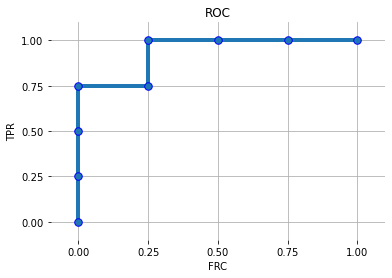

In [51]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from matplotlib.ticker import AutoMinorLocator,MultipleLocator,FuncFormatter
from scipy.interpolate import make_interp_spline

#设置x，y 的主刻度定位器
ax=plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(0.25))
# 设置x，y的范围
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.title("ROC")
plt.xlabel("FRC")
plt.ylabel("TPR")
plt.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# 数值
x = np.array([0,0,0,0,0.25,0.25,0.5,0.75,1])
y = np.array([0,0.25,0.5,0.75,0.75,1,1,1,1])
plt.plot(x, y, marker='.',markeredgecolor="blue",markersize=15,linewidth=4)

好，我们绘制完了这个ROC，又发现了吗，ROC左上角有一个缺口，这个缺口就是因为N1的概率值大于P4的原因，我们在P3之后遇到了N1先往左移动了。

正样本数是M ，负样本数是N （本例中M=4， N=4）

好啰嗦了半天，现在才进入正题，这个ROC曲线的下部分面积是什么？ 是不是M\*N-1，刚好少的这块矩形就是N1和P4的样本对。因为（N1,P4）这一对样本是负样本概率>正样本概率。

ROC曲线的下面的矩形个数或者面积就是正样本得分大于负样本得分的面积或者个数

那么回到最开始AUC的定义：随机取一对正负样本，正样本得分大于负样本得分的概率。，在这个例子中就是（$M*N$-1）/($M*N$)，，这里$M*N$就是总的样本对数

$$ AUC = AUC=（M*N-1）/($M*N$)=(4*4-1)/(4*4)=15/16 $$

**为了更好理解，我们来看一个P4和N1预测错误的情况**

|  P1  | P2  | N1  |  N2  | P3  | P4  | N3  | N4  |
|  :----:  |  :----:  | :----:  |  :----:  |  :----:  | :----:  |  :----:  | :----:  |
| 0.9  | 0.8 | 0.7 | 0.6 | 0.4 | 0.3 | 0.2 | 0.1 |
| 1  | 1 | 0 | 0 | 1 | 1 | 0 | 0 | 0 |
| 预测为1  | 预测为1 | 预测为1 | 预测为1 | 预测为0 | 预测为0 | 预测为0 | 预测为0 | 预测为0 |

绘制ROC曲线，从P1开始往上走，P2继续往上走碰到N1往右，N2继续往右，然后P3、P4往上，N3、N4往右，最终的ROC曲线

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from matplotlib.ticker import AutoMinorLocator,MultipleLocator,FuncFormatter
from scipy.interpolate import make_interp_spline

#设置x，y 的主刻度定位器
ax=plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(0.25))
ax.yaxis.set_major_locator(MultipleLocator(0.25))
# 设置x，y的范围
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.title("ROC")
plt.xlabel("FRC")
plt.ylabel("TPR")
plt.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# 数值
x = np.array([0,0,0,0,0.25,0.25,0.5,0.75,1])
y = np.array([0,0.25,0.5,0.75,0.75,1,1,1,1])
plt.plot(x, y, marker='.',markeredgecolor="blue",markersize=15,linewidth=4)